### Gather, explore, and clean data

In [1]:
# Load book data from csv
import pandas as pd
books = pd.read_csv('book_data/books.csv')
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [2]:
# Explore features
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [3]:
# Load tags book_tags data from csv
book_tags = pd.read_csv('book_data/book_tags.csv')
book_tags.sample(5)

,goodreads_book_id,tag_id,count
807002,12591698,22743,152
555142,777211,7303,9
106978,13067,18284,8
211697,34072,2244,5
580085,1062516,9557,8


In [4]:
tags = pd.read_csv('book_data/tags.csv')
tags.sample(5)

,tag_id,tag_name
15491,15491,indiana
29781,29781,the-fallen-series
3212,3212,ashnan-library
31320,31320,turgenev
24019,24019,portuguese-literature


In [5]:
# Merge book_tags and tags 
tags_join = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join.sample(5)

,goodreads_book_id,tag_id,count,tag_name
936104,41811,3236,191,asimov
883442,8542839,17241,18,kindle-freebie
524841,747746,31656,23,usa
515699,3491072,31174,5,travel-literature
912874,598159,25083,4,read-children


In [6]:
# Merge tags_join and books
books_with_tags = pd.merge(books, tags_join, left_on='book_id', right_on='goodreads_book_id', how='inner')
books_with_tags.sample(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_id,count,tag_name
553995,5541,303472,303472,1880,15,689839081,9.780690e+12,Margaret Peterson Haddix,2001.0,"Among the Impostors (Shadow Children, #2)",...,764,5311,9075,8595,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,303472,6960,11,childrens-books
26927,270,12873,17899948,46663,306,1844080382,9.781844e+12,"Daphne du Maurier, Sally Beauman",1938.0,Rebecca,...,10900,49263,112768,152100,https://images.gr-assets.com/books/1327871977m...,https://images.gr-assets.com/books/1327871977s...,12873,18045,257,library
677761,6778,1027760,1027760,1092326,23,670446149,9.780670e+12,Ludwig Bemelmans,1956.0,Madeline and the Bad Hat,...,479,2813,4189,8656,https://images.gr-assets.com/books/1355497395m...,https://images.gr-assets.com/books/1355497395s...,1027760,17157,2,kids-picture-book
841568,8417,6326920,6326920,6512514,46,385529376,9.780386e+12,Ben Mezrich,2009.0,The Accidental Billionaires: The Founding of F...,...,1288,4213,4124,1834,https://images.gr-assets.com/books/1320527444m...,https://images.gr-assets.com/books/1320527444s...,6326920,28009,7,social
326117,3262,2247142,2247142,1817520,139,393332144,9.780393e+12,Patricia Highsmith,1955.0,The Talented Mr. Ripley,...,1821,8374,15903,10867,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,2247142,26735,14,school


In [7]:
books_with_tags.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url', 'goodreads_book_id', 'tag_id', 'count', 'tag_name'],
      dtype='object')

In [8]:
# Store tags into the same book id row
temp_df = books_with_tags.groupby('book_id')['tag_name'].apply(' '.join).reset_index()
temp_df.head(5)

,book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read fantasy favorites currently-reading yo...
2,3,to-read fantasy favorites currently-reading yo...
3,5,to-read fantasy favorites currently-reading yo...
4,6,to-read fantasy young-adult fiction harry-pott...


In [9]:
# Merge tag_names back into books
books = pd.merge(books, temp_df, left_on='book_id', right_on='book_id', how='inner')
books.sample(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
247,248,1622,1622,894834,1379,743477545,9.780743e+12,"William Shakespeare, Barbara A. Mowat, Paul We...",1595.0,A Midsummer Night's Dream,...,361510,5724,5598,20498,84388,130051,120975,https://images.gr-assets.com/books/1327874534m...,https://images.gr-assets.com/books/1327874534s...,to-read fantasy favorites currently-reading fi...
2303,2304,46165,46165,2520849,607,684843781,9.780685e+12,F. Scott Fitzgerald,1920.0,This Side of Paradise,...,47633,2777,1137,4298,14047,17247,10904,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read favorites fiction books-i-own owned fa...
1667,1668,23437156,23437156,42077459,48,1627792120,9.781628e+12,Leigh Bardugo,2015.0,Six of Crows,...,101264,17068,1100,1725,7886,29552,61001,https://images.gr-assets.com/books/1500689111m...,https://images.gr-assets.com/books/1500689111s...,to-read fantasy favorites currently-reading yo...
5785,5786,324748,324748,315438,30,1591841666,9.781592e+12,Seth Godin,2007.0,The Dip: A Little Book That Teaches You When t...,...,15969,1127,410,1154,4052,5551,4802,https://images.gr-assets.com/books/1311282216m...,https://images.gr-assets.com/books/1311282216s...,to-read favorites currently-reading books-i-ow...
4809,4810,12467,12467,2223651,88,312265050,9.780312e+12,Norman Mailer,1948.0,The Naked and the Dead,...,19912,641,358,1059,4375,7826,6294,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,to-read favorites currently-reading fiction bo...


In [10]:
# Explore book tags
books['tag_name']

0       to-read fantasy favorites currently-reading yo...
1       to-read fantasy favorites currently-reading yo...
2       to-read fantasy favorites currently-reading yo...
3       to-read favorites currently-reading young-adul...
4       to-read favorites currently-reading young-adul...
                              ...                        
9995    to-read fantasy favorites currently-reading fi...
9996    to-read favorites currently-reading books-i-ow...
9997    to-read favorites currently-reading fiction bo...
9998    to-read favorites currently-reading books-i-ow...
9999    to-read favorites currently-reading books-i-ow...
Name: tag_name, Length: 10000, dtype: object

### Transform data

In [11]:
# Transform text to feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['tag_name'])
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Build machine learning recommendation engine

In [12]:
# Use numeric values to find similarities
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.23560979, 0.28324674, ..., 0.05084198, 0.07947133,
        0.01691533],
       [0.23560979, 1.        , 0.22459026, ..., 0.0530554 , 0.07126569,
        0.02330787],
       [0.28324674, 0.22459026, 1.        , ..., 0.03356699, 0.04251551,
        0.01473002],
       ...,
       [0.05084198, 0.0530554 , 0.03356699, ..., 1.        , 0.0262993 ,
        0.07240815],
       [0.07947133, 0.07126569, 0.04251551, ..., 0.0262993 , 1.        ,
        0.07219924],
       [0.01691533, 0.02330787, 0.01473002, ..., 0.07240815, 0.07219924,
        1.        ]])

In [13]:
# Get book recommendations based on the cosine similarity score of book tags 
# Build a 1-dimensional array with book titles
titles = books['title']
tag_name = books['tag_name']
indices = pd.Series(books.index, index=books['title'])

In [14]:
# Function that gets similarity scores
def tags_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11] # How many results to display
    book_indices = [i[0] for i in sim_scores]
    title_df = pd.DataFrame({'title': titles.iloc[book_indices].tolist(),
                           'similarity': [i[1] for i in sim_scores],
                            'tag_name': tag_name.iloc[book_indices].tolist()}, 
                           index=book_indices)
    return title_df

In [15]:
# Get book tags, total tags, and percentage of common tags
def recommend_stats(target_book_title):
     
    # Get recommended books
    rec_df = tags_recommendations(target_book_title)
     
    # Get tags of the target book
    rec_book_tags = books_with_tags[books_with_tags['title'] == target_book_title]['tag_name'].to_list()
     
    # Create dictionary of tag lists by book title
    book_tag_dict = {}
    for title in rec_df['title'].tolist():
        book_tag_dict[title] = books_with_tags[books_with_tags['title'] == title]['tag_name'].to_list()
     
    # Create dictionary of tag statistics by book title
    tags_stats = {}
    for book, tags in book_tag_dict.items():
        tags_stats[book] = {}
        tags_stats[book]['total_tags'] = len(tags)
        # Get tags in recommended book that are also in target book
        same_tags = set(rec_book_tags).intersection(set(tags)) 
        tags_stats[book]['%_common_tags'] = (len(same_tags) / len(tags)) * 100
     
    # Convert dictionary to dataframe
    tags_stats_df = pd.DataFrame.from_dict(tags_stats, orient='index').reset_index().
        rename(columns={'index': 'title'})
     
    # Merge tag statistics dataframe to recommended books dataframe
    all_stats_df = pd.merge(rec_df, tags_stats_df, on='title')
    return all_stats_df

In [16]:
# Find book recommendations
lor_recs = recommend_stats('The Fellowship of the Ring (The Lord of the Rings, #1)')
lor_recs

,title,similarity,tag_name,total_tags,%_common_tags
0,"The Return of the King (The Lord of the Rings,...",0.865246,to-read fantasy favorites currently-reading yo...,100,92.0
1,"The Two Towers (The Lord of the Rings, #2)",0.846638,to-read fantasy favorites currently-reading yo...,100,90.0
2,"The Lord of the Rings (The Lord of the Rings, ...",0.676849,to-read fantasy favorites currently-reading yo...,100,84.0
3,The Silmarillion (Middle-Earth Universe),0.638828,to-read fantasy favorites currently-reading yo...,100,77.0
4,The Hobbit,0.598920,to-read fantasy favorites currently-reading yo...,100,76.0
5,The Children of Húrin,0.537546,to-read fantasy favorites currently-reading yo...,100,67.0
6,Unfinished Tales of Númenor and Middle-Earth,0.532336,to-read fantasy favorites currently-reading fi...,100,65.0
7,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,0.514953,to-read fantasy favorites currently-reading yo...,100,59.0
8,The Hobbit: Graphic Novel,0.486699,to-read fantasy favorites currently-reading yo...,100,59.0
9,"Pawn of Prophecy (The Belgariad, #1)",0.424535,to-read fantasy favorites currently-reading yo...,100,61.0


### Build diversity recommendation engine proof of concept

In [17]:
# Function that gets similarity scores
def tags_recommendations_all(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#     sim_scores = sim_scores[1:11] # How many results to display
    book_indices = [i[0] for i in sim_scores]
    title_df = pd.DataFrame({'title': titles.iloc[book_indices].tolist(),
                           'similarity': [i[1] for i in sim_scores],
                            'tag_name': tag_name.iloc[book_indices].tolist()}, 
                           index=book_indices)
    return title_df

In [18]:
# Get book tags, total tags, and percentage of common tags
def recommend_stats_all(target_book_title):
     
    # Get recommended books
    rec_df = tags_recommendations_all(target_book_title)
     
    # Get tags of the target book
    rec_book_tags = books_with_tags[books_with_tags['title'] == target_book_title]['tag_name'].to_list()
     
    # Create dictionary of tag lists by book title
    book_tag_dict = {}
    for title in rec_df['title'].tolist():
        book_tag_dict[title] = books_with_tags[books_with_tags['title'] == title]['tag_name'].to_list()
     
    # Create dictionary of tag statistics by book title
    tags_stats = {}
    for book, tags in book_tag_dict.items():
        tags_stats[book] = {}
        tags_stats[book]['total_tags'] = len(tags)
        same_tags = set(rec_book_tags).intersection(set(tags)) # Get tags in recommended book that are also in target book
        tags_stats[book]['%_common_tags'] = (len(same_tags) / len(tags)) * 100
     
    # Convert dictionary to dataframe
    tags_stats_df = pd.DataFrame.from_dict(tags_stats, orient='index').reset_index().rename(columns={'index': 'title'})
     
    # Merge tag statistics dataframe to recommended books dataframe
    all_stats_df = pd.merge(rec_df, tags_stats_df, on='title')
    return all_stats_df

In [19]:
# Find book recommendations
lor_recs = recommend_stats_all('The Fellowship of the Ring (The Lord of the Rings, #1)')
lor_recs

,title,similarity,tag_name,total_tags,%_common_tags
0,The Fellowship of the Ring (The Lord of the Ri...,1.000000,to-read fantasy favorites currently-reading yo...,100,100.0
1,"The Return of the King (The Lord of the Rings,...",0.865246,to-read fantasy favorites currently-reading yo...,100,92.0
2,"The Two Towers (The Lord of the Rings, #2)",0.846638,to-read fantasy favorites currently-reading yo...,100,90.0
3,"The Lord of the Rings (The Lord of the Rings, ...",0.676849,to-read fantasy favorites currently-reading yo...,100,84.0
4,The Silmarillion (Middle-Earth Universe),0.638828,to-read fantasy favorites currently-reading yo...,100,77.0
...,...,...,...,...,...
9995,Maryamah Karpov: Mimpi-mimpi Lintang (Tetralog...,0.012938,to-read favorites currently-reading young-adul...,100,16.0
9996,The Power of Art,0.012782,to-read favorites currently-reading default en...,100,8.0
9997,Veganomicon: The Ultimate Vegan Cookbook,0.011444,to-read favorites currently-reading books-i-ow...,100,16.0
9998,Edvard Munch: 1863-1944 (Basic Art),0.011206,to-read favorites currently-reading books-i-ow...,100,8.0


In [20]:
# Find Zero to One book
lor_recs[lor_recs.title == 'Zero to One: Notes on Startups, or How to Build the Future']

,title,similarity,tag_name,total_tags,%_common_tags
8592,"Zero to One: Notes on Startups, or How to Buil...",0.040449,to-read favorites currently-reading books-i-ow...,100,23.0


In [21]:
# Calculate statistical data
lor_recs.describe()

,similarity,total_tags,%_common_tags
count,10000.000000,10000.000000,10000.000000
mean,0.102232,100.791200,32.274768
std,0.074764,10.475045,8.876842
min,0.010575,56.000000,4.000000
25%,0.051356,100.000000,26.000000
50%,0.077337,100.000000,32.000000
75%,0.128055,100.000000,38.000000
max,1.000000,400.000000,100.000000


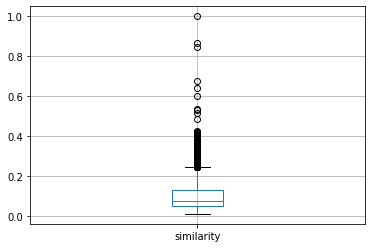

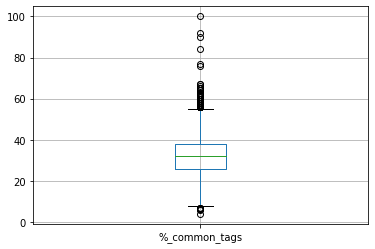

In [22]:
# Boxplot of similarity score
import matplotlib.pyplot as plt
lor_recs.boxplot(column=['similarity'])
plt.show()
 
# Boxplot of percentage of common tags
lor_recs.boxplot(column=['%_common_tags'])
plt.show()

In [23]:
# Store book tags into new dataframe
lor_tags = pd.DataFrame(books_with_tags[books_with_tags['title']=='The Fellowship of the Ring (The Lord of the Rings, #1)']['tag_name'])
lor_tags.sample(5)

,tag_name
1891,middle-earth
1871,adult-fiction
1805,fiction
1826,novels
1814,adventure


In [24]:
# Find most frequent word used in book tags
import matplotlib
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

top_N = 10
txt = lor_tags.tag_name.str.lower().str.replace(r'-', ' ').str.cat(sep=' ') # Remove hyphens
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
 
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
print('All frequencies, including STOPWORDS:')
print('=' * 60)
lor_rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

All frequencies, including STOPWORDS:


        Word  Frequency
0    fantasy         12
1    fiction          8
2       read          7
3      books          6
4         my          5
5  favorites          4
6        sci          4
7         fi          4
8         to          3
9      adult          3


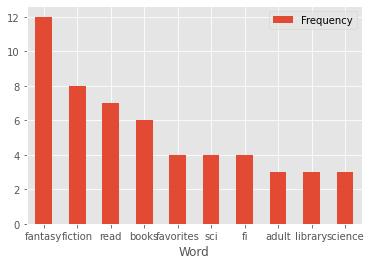

In [25]:
print(lor_rslt)
print('=' * 60)
lor_rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
 
lor_rslt.plot.bar(rot=0)
plt.show()

In [26]:
# Filter by unlike words
lor_recs_filter = lor_recs[(lor_recs['tag_name'].str.contains('non-fiction'))]
lor_recs_filter = lor_recs[(lor_recs['tag_name'].str.contains('economics'))]
lor_recs_filter = lor_recs[(lor_recs['tag_name'].str.contains('entrepreneurial'))]
lor_recs_filter

,title,similarity,tag_name,total_tags,%_common_tags
8592,"Zero to One: Notes on Startups, or How to Buil...",0.040449,to-read favorites currently-reading books-i-ow...,100,23.0
8683,The $100 Startup: Reinvent the Way You Make a ...,0.039505,to-read favorites currently-reading books-i-ow...,100,22.0
8865,The Dip: A Little Book That Teaches You When t...,0.037474,to-read favorites currently-reading books-i-ow...,100,23.0
9562,The Lean Startup: How Today's Entrepreneurs Us...,0.028992,to-read favorites currently-reading books-i-ow...,100,24.0
9759,"The Art of the Start: The Time-Tested, Battle-...",0.024674,to-read favorites currently-reading books-i-ow...,100,22.0
9796,The E-Myth Revisited: Why Most Small Businesse...,0.023662,to-read favorites currently-reading books-i-ow...,100,22.0
9920,Business Model Generation,0.019297,to-read favorites currently-reading books-i-ow...,100,20.0


In [27]:
# Merge recommendations with ratings
lor_recs_filter_merge = pd.merge(books[['title', 'average_rating']], lor_recs_filter, left_on='title', right_on='title', how='inner')
 
# Sort by highest average rating
lor_recs_filter_merge = lor_recs_filter_merge.sort_values(by=['average_rating'], ascending=False)
lor_recs_filter_merge

,title,average_rating,similarity,tag_name,total_tags,%_common_tags
1,"Zero to One: Notes on Startups, or How to Buil...",4.17,0.040449,to-read favorites currently-reading books-i-ow...,100,23.0
4,Business Model Generation,4.16,0.019297,to-read favorites currently-reading books-i-ow...,100,20.0
0,The Lean Startup: How Today's Entrepreneurs Us...,4.04,0.028992,to-read favorites currently-reading books-i-ow...,100,24.0
2,The E-Myth Revisited: Why Most Small Businesse...,3.98,0.023662,to-read favorites currently-reading books-i-ow...,100,22.0
3,The $100 Startup: Reinvent the Way You Make a ...,3.85,0.039505,to-read favorites currently-reading books-i-ow...,100,22.0
6,The Dip: A Little Book That Teaches You When t...,3.83,0.037474,to-read favorites currently-reading books-i-ow...,100,23.0
5,"The Art of the Start: The Time-Tested, Battle-...",3.82,0.024674,to-read favorites currently-reading books-i-ow...,100,22.0
